Importo las librerías a utilizar

In [22]:
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score


Abro los datasets  para realizar un análisis exploratorio general de mis datos.

In [23]:
hospitalizaciones_test=pd.read_csv("./datasets/hospitalizaciones_test.csv")
hospitalizaciones_train=pd.read_csv("./datasets/hospitalizaciones_train.csv")

In [24]:
hospitalizaciones_test.head(5)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit
0,3,gynecology,F,Dr Olivia,10,2858,21-30,Female,Trauma,Moderate,Other,2,No,4749.640225
1,2,TB & Chest disease,E,Dr John,4,65657,51-60,Female,Trauma,Moderate,Asthama,2,Yes,4122.261324
2,2,radiotherapy,E,Dr John,7,45598,51-60,Other,Trauma,Moderate,None,3,No,5459.067882
3,2,gynecology,F,Dr Olivia,1,31132,21-30,Female,Trauma,Moderate,None,2,Yes,3987.033318
4,2,anesthesia,A,Dr John,7,125021,51-60,Female,Trauma,Extreme,Diabetes,2,No,4770.789695


In [25]:
hospitalizaciones_train.head()#El que deben usar para entrenar el modelo

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


Pre-Procesamiento de Datos:Paso de variables categóricas a dummies. Hacemos el encoding

In [26]:
hospitalizaciones_train['Admission_Deposit'].mean()# Quiero ver cual es la media de depositos de admision para poder normalizarla

4723.419239008682

In [27]:
hospitalizaciones_train['Admission_Deposit'].max()

10104.72639

In [28]:
#Utilizo 5000 como punto de quiebre porque esta cerca de la media 
hospitalizaciones_train.loc[hospitalizaciones_train['Admission_Deposit'] <5000 , 'Admission_Deposit']= 1
hospitalizaciones_train.loc[hospitalizaciones_train['Admission_Deposit'] >=5000 , 'Admission_Deposit']= 2


hospitalizaciones_test.loc[hospitalizaciones_test['Admission_Deposit'] <5000 , 'Admission_Deposit']= 1
hospitalizaciones_test.loc[hospitalizaciones_test['Admission_Deposit'] >=5000 , 'Admission_Deposit']= 2

'''
$<5000 =1
$>=5000 =2
'''

'\n$<5000 =1\n$>=5000 =2\n'

In [29]:
hospitalizaciones_train['Age'].unique()# quiero ver cuantos valores unicos hay

array(['41-50', '31-40', '21-30', '71-80', '11-20', '51-60', '61-70',
       '81-90', '91-100', '0-10'], dtype=object)

In [30]:
hospitalizaciones_test['Age']=hospitalizaciones_test['Age'].replace({'0-10':1,'11-20':2,'21-30':3,'31-40':4,'41-50':5,'51-60':6,'61-70':7,'71-80':8,'81-90':9,'91-100':10 })
hospitalizaciones_train['Age']=hospitalizaciones_train['Age'].replace({'0-10':1,'11-20':2,'21-30':3,'31-40':4,'41-50':5,'51-60':6,'61-70':7,'71-80':8,'81-90':9,'91-100':10 })
'''
'0-10':1,
'11-20':2,
'21-30':3,
'31-40':4,
'41-50':5,
'51-60':6,
'61-70':7,
'71-80':8,
'81-90':9,
'91-100':10
'''

"\n'0-10':1,\n'11-20':2,\n'21-30':3,\n'31-40':4,\n'41-50':5,\n'51-60':6,\n'61-70':7,\n'71-80':8,\n'81-90':9,\n'91-100':10\n"

In [31]:
hospitalizaciones_train['Department'].unique()# quiero ver cuantos valores unicos hay

array(['gynecology', 'anesthesia', 'TB & Chest disease', 'radiotherapy',
       'surgery'], dtype=object)

In [32]:
hospitalizaciones_test['Department']=hospitalizaciones_test['Department'].replace({'gynecology':1,'anesthesia':2,'TB & Chest disease':3,'radiotherapy':4,'surgery':5 })
hospitalizaciones_train['Department']=hospitalizaciones_train['Department'].replace({'gynecology':1,'anesthesia':2,'TB & Chest disease':3,'radiotherapy':4,'surgery':5 })
'''
'gynecology':1
'anesthesia':2
'TB & Chest disease':3
'radiotherapy':4
'surgery':5
'''

"\n'gynecology':1\n'anesthesia':2\n'TB & Chest disease':3\n'radiotherapy':4\n'surgery':5\n"

In [33]:
hospitalizaciones_train['health_conditions'].unique()# quiero ver cuantos valores unicos hay

array(['Diabetes', 'Heart disease', 'None', 'Other', 'Asthama',
       'High Blood Pressure'], dtype=object)

In [34]:
hospitalizaciones_test['health_conditions']=hospitalizaciones_test['health_conditions'].replace({'Diabetes':1,'Heart disease':2,'None':3,'Other':4,'Asthama':5,'High Blood Pressure':6 })
hospitalizaciones_train['health_conditions']=hospitalizaciones_train['health_conditions'].replace({'Diabetes':1,'Heart disease':2,'None':3,'Other':4,'Asthama':5,'High Blood Pressure':6 })
'''
Diabetes':1,
'Heart disease':2,
'None':3,
'Other':4,
'Asthama':5,
'High Blood Pressure':6
'''


"\nDiabetes':1,\n'Heart disease':2,\n'None':3,\n'Other':4,\n'Asthama':5,\n'High Blood Pressure':6\n"

In [35]:
hospitalizaciones_train['Severity of Illness'].unique()# quiero ver cuantos valores unicos hay

array(['Extreme', 'Minor', 'Moderate'], dtype=object)

In [36]:
hospitalizaciones_test['Severity of Illness']=hospitalizaciones_test['Severity of Illness'].replace({'Extreme':1,'Minor':2,'Moderate':3})
hospitalizaciones_train['Severity of Illness']=hospitalizaciones_train['Severity of Illness'].replace({'Extreme':1,'Minor':2,'Moderate':3 })
'''
'Extreme':1,
'Minor':2,
'Moderate':3
'''


"\n'Extreme':1,\n'Minor':2,\n'Moderate':3\n"

In [37]:
hospitalizaciones_train['Stay (in days)'].unique()# quiero ver cuantos valores unicos hay 

array([ 8,  9,  7, 34, 11, 12, 16,  5, 26, 21, 10,  6, 20, 22, 39, 14, 17,
       32, 24, 35, 25, 23, 33, 19, 38, 13, 36, 31, 40, 15, 18, 28, 27, 30,
        4, 29, 37, 45, 43, 41, 46, 42, 44, 47, 48,  3, 49, 50, 51],
      dtype=int64)

Creo la columna objetivo en base a la columna stay in days 0 para estadías cortas y 1 para estadías largas para mayores a 8 días estadia larga.

In [38]:
hospitalizaciones_train.loc[hospitalizaciones_train['Stay (in days)'] <= 8 , 'Stay (in days)']= 0
hospitalizaciones_train.loc[hospitalizaciones_train['Stay (in days)'] > 8 , 'Stay (in days)']= 1

hospitalizaciones_train=hospitalizaciones_train.rename(columns={'Stay (in days)':'pred'})


hospitalizaciones_test['pred']=''# agrego una columna a test 


Me deshago de las columnas que no aportan a mi modelo.
Para muchas de estas me guie unicamente por logica.

In [39]:
#Podria borrar los duplicados pero no tengo suficiente contexto como para hacerlo 
hospitalizaciones_train['patientid'].duplicated().sum()

287606

In [40]:
hospitalizaciones_train.drop(columns=['Ward_Facility_Code','doctor_name','patientid','Type of Admission','Visitors with Patient','Available Extra Rooms in Hospital','Insurance','gender'],inplace=True)
hospitalizaciones_test.drop(columns=['Ward_Facility_Code','doctor_name','patientid','Type of Admission','Visitors with Patient','Available Extra Rooms in Hospital','Insurance','gender'],inplace=True)

Analiso la relacion entre las Variables 

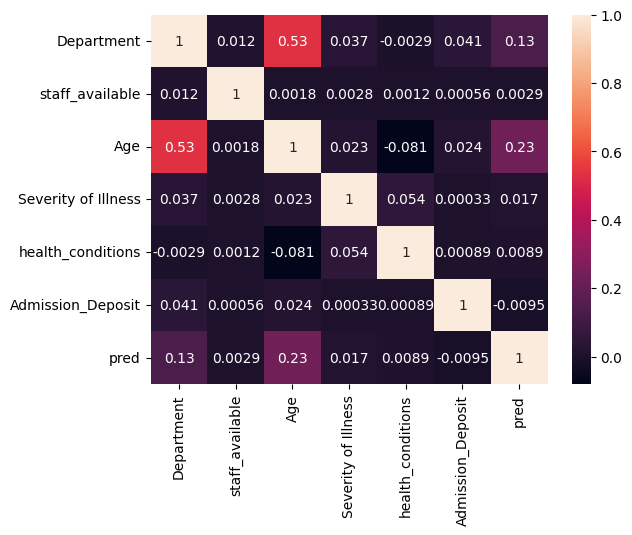

In [41]:
corr = hospitalizaciones_train.corr()# usamos el corr para ver la correlacion entre columnas 
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True);

Luego de  ver esta informacion puedo precindir de la columna admission_deposit y la de staff_avaiable.

In [42]:
hospitalizaciones_train.drop(columns=['staff_available','Admission_Deposit'],inplace=True)
hospitalizaciones_test.drop(columns=['staff_available','Admission_Deposit'],inplace=True)

Comienzo un análisis general de mis datasets para saber cuántos datos faltantes (None/NaN/null) y datos repetidos se encuentran

In [43]:
hospitalizaciones_train.describe()

,Department,Age,Severity of Illness,health_conditions,pred
count,410000.000000,410000.000000,410000.000000,410000.000000,410000.000000
mean,1.726751,4.126151,2.389110,3.567861,0.622966
std,1.193354,1.628469,0.765135,1.546556,0.484644
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,3.000000,2.000000,3.000000,0.000000
50%,1.000000,4.000000,3.000000,3.000000,1.000000
75%,2.000000,5.000000,3.000000,5.000000,1.000000
max,5.000000,10.000000,3.000000,6.000000,1.000000


In [44]:
hospitalizaciones_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410000 entries, 0 to 409999
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   Department           410000 non-null  int64
 1   Age                  410000 non-null  int64
 2   Severity of Illness  410000 non-null  int64
 3   health_conditions    410000 non-null  int64
 4   pred                 410000 non-null  int64
dtypes: int64(5)
memory usage: 15.6 MB


In [45]:
hospitalizaciones_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Department           90000 non-null  int64 
 1   Age                  90000 non-null  int64 
 2   Severity of Illness  90000 non-null  int64 
 3   health_conditions    90000 non-null  int64 
 4   pred                 90000 non-null  object
dtypes: int64(4), object(1)
memory usage: 3.4+ MB


LOS DATASETS ESTAN COMPLETOS ASI QUE NO HAY QUE COMPLETAR CON DATOS 

El dataset parece estar limpio por lo que podemos proseguir 

Entonces los dataset quedarian asi 

In [46]:
hospitalizaciones_train

,Department,Age,Severity of Illness,health_conditions,pred
0,1,5,1,1,0
1,1,4,2,2,1
2,1,3,1,1,0
3,1,4,3,3,0
4,2,8,3,1,1
...,...,...,...,...,...
409995,1,4,2,5,0
409996,1,3,1,4,1
409997,1,3,2,5,1
409998,1,3,3,4,1


In [47]:
hospitalizaciones_test

,Department,Age,Severity of Illness,health_conditions,pred
0,1,3,3,4,
1,3,6,3,5,
2,4,6,3,3,
3,1,3,3,3,
4,2,6,1,1,
...,...,...,...,...,...
89995,1,2,2,6,
89996,1,4,3,4,
89997,1,2,3,6,
89998,4,7,1,1,


Defino x e y

In [48]:
X=hospitalizaciones_train.iloc[:,:4].values
Y=hospitalizaciones_train.iloc[:,4].values # columna target 

Hago la separacion de los datos 

In [49]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.20, random_state=20)

Escalamos los datos 

no debe ajustar ningún algoritmo de preprocesamiento (PCA, StandardScaler...) en todo el conjunto de datos, sino solo en el conjunto de entrenamiento

In [50]:
sc_X = StandardScaler() # instanciamos 
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

En este momento tenemos los datos listos para construir el modelo LogisticRegression

In [51]:
modelo=LogisticRegression()# instanciamos el modelo 
modelo.fit(X_Train,Y_Train)

LogisticRegression()

Realizo una prediccion 

In [52]:
y_pred=modelo.predict(X_Test)

Calculamos las metricas para verificar el rendimiento del  modelo

Matriz de confusión

In [53]:
matriz=confusion_matrix(Y_Test,y_pred)
matriz
'''
vp:3120
fp:27623
fn:4677
vp:46580
'''
matriz

array([[ 3120, 27623],
       [ 4677, 46580]], dtype=int64)

Precisión
verdaderos positivos sobre los verdaderos positivos + los falsos positivos.

In [54]:
precision=precision_score(Y_Test,y_pred)
precision

0.6277374230152419

Exatitud
La exactitud del modelo es básicamente el número total de predicciones correctas dividido por el número total de predicciones.

In [55]:
exatitud=accuracy_score(Y_Test,y_pred)
exatitud

0.6060975609756097

Recall o exhaustividad
verdaderos positivos sobre los verdaderos positivos + falsos negativos.

In [56]:
sensibilidad=recall_score(Y_Test,y_pred)
sensibilidad

0.9087539262929941

F1 Combinación entre la precision y la sensibilidad

In [57]:
puntajef1=f1_score(Y_Test,y_pred)
puntajef1

0.7425474254742547

Curva ROC 
Esta métrica nos indica cuán bien puede distinguir el modelo entre dos clases.

Un modelo excelente tendrá un AUC = 1.

El el azar tendrá un AUC = 0.5

Con un AUC = 0 tendremos un modelo que clasifica todas las etiquetas al revés

In [58]:
roc_auc=roc_auc_score(Y_Test,y_pred)
roc_auc

0.5051202217744775

* alta exhaustividad + alta precisión: el modelo maneja perfectamente la clase	
* baja exhaustividad + alta precisión: el modelo no puede detectar bien la clase pero es muy 	confiable cuando lo hace
* alta exhaustividad + baja precisión: la clase está bien detectada pero el modelo también incluye 	puntos de otras clases
* baja exhaustividad + baja precisión: el modelo maneja mal la clase

Con todos los analisis que realize llegue a la conclucion de que mi modelo actual tiene que mejorar 
la clase está bien detectada pero el modelo también incluye puntos de otras clases

_______________________________________________________________________________